# Actividad - Ecuaciones diferenciales

In [18]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [43]:
def f(x, t):
    return x/(t+1)

In [20]:
odeint?

Grafique con condición inicial $x_0 = 2$

In [44]:
x

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 6020
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000e+00, 1.00000e-04, 1.10000e-03, ..., 9.98111e+01,
       9.99111e+01, 1.00000e+02])
 t_events: None
        y: array([[ 2.        ,  2.        ,  2.0000002 , ..., 98.85617499,
        98.95612989, 99.04498988]])
 y_events: None

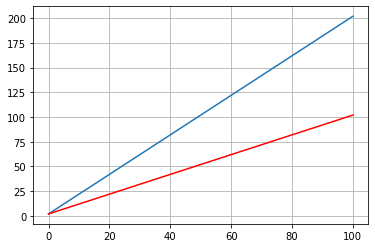

In [57]:
x0 = 2
n=100
t = np.linspace(0, 100, 10000)
x = odeint(f, x0, t)
plt.figure()
plt.plot(t, x)
plt.plot(t, t+2, "r")
plt.grid()


In [58]:
x

array([[  2.      ],
       [  2.020002],
       [  2.040004],
       ...,
       [201.959996],
       [201.979998],
       [202.      ]])

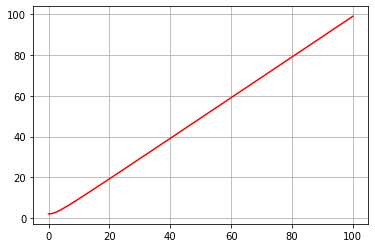

In [64]:
def f(x, t):
    return x/(t+1)

x0 = 2
n=100
t = np.linspace(0, 100, 10000)
tspan=[0, 100]
x = solve_ivp(f, tspan, [2], max_step=.1)
plt.figure()
plt.plot(x.t, x.y[0,:], "r")

plt.grid()


2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [60]:
x0=0.5
dx0=.1
w0=3

def fun(t, x):
    return np.asarray([x[1], -w0**2*x[0]])
tspan = [0, 10]

resolverx=solve_ivp(fun, tspan, np.asarray([x0, dx0]), max_step=.1)

Grafique

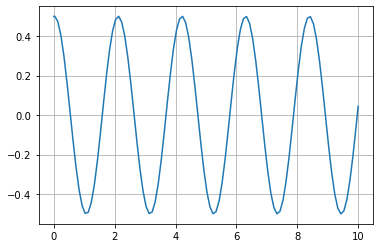

In [61]:
plt.figure()
plt.grid()
plt.plot(resolverx.t, resolverx.y[0, :])

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [62]:
def fn(t, w0, x0, dx0):
    C1 = x0
    C2 = dx0/w0
    return C1*np.cos(w0*t) + C2*np.sin(w0*t)

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

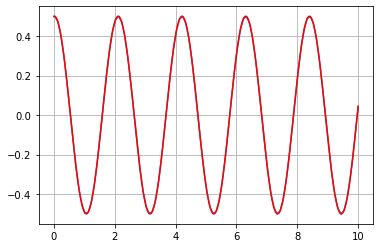

In [63]:
plt.figure()
plt.plot(resolverx.t, resolverx.y[0, :])
t = np.linspace(0, 10, 100000)
Sob = fn(t, w0, x0, dx0)
plt.plot(t, Sob, "r")
plt.grid()

La solución analítica queda igual a la numérica estaría sobre ella exactamente 